In [1]:
import pandas as pd 
df = pd.read_csv("train.csv")

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

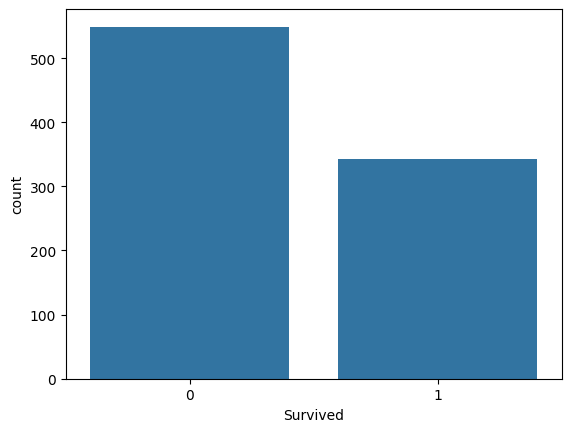

In [3]:
import seaborn as sb

sb.countplot(x="Survived", data=df)

<Axes: xlabel='Survived', ylabel='count'>

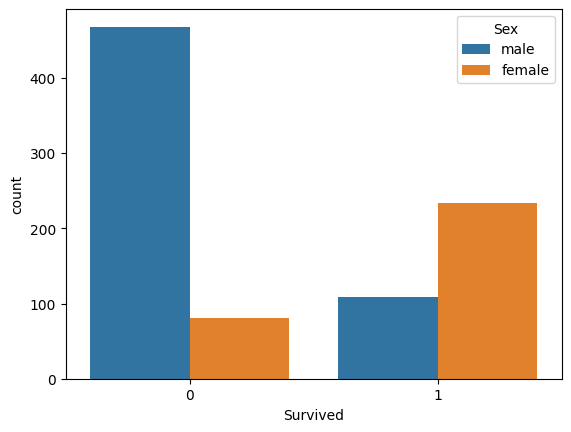

In [4]:
sb.countplot(x="Survived", data=df, hue="Sex")

In [5]:
# verificar los datos vacios haaciendo una sumatoria
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

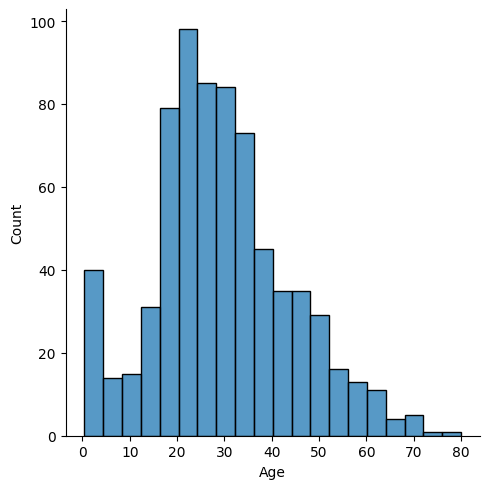

In [6]:
sb.displot(x="Age", data=df)

In [7]:
# rellenar los datos vacios de la columna de edad con la media de datos 
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [8]:
df = df.drop(["Cabin"], axis=1)

In [9]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
df = df.dropna()

In [11]:
df = df.drop(["Name","PassengerId","Ticket"], axis=1)

In [12]:
# convertir datos de genero a numeros 
dummies_sex = pd.get_dummies(df["Sex"], drop_first=True)
# obtener solo una columna para evitar multicollinearity: que se da cuando se encuentran relaciones en datos categoricos  

In [13]:
df = df.join(dummies_sex)
df = df.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

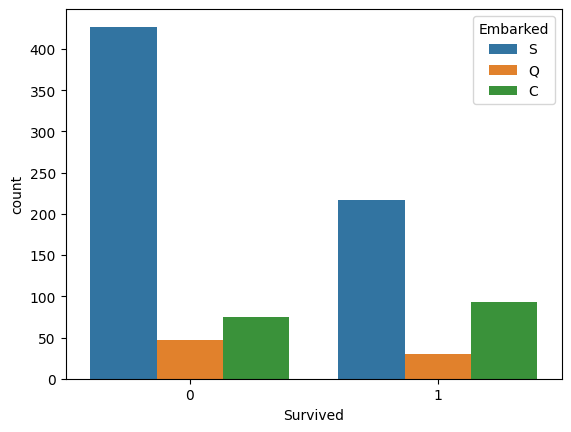

In [14]:
sb.countplot(x="Survived", data=df, hue="Embarked")

In [15]:
dummies_embarked = pd.get_dummies(df["Embarked"], drop_first=True)
df = df.join(dummies_embarked)
df = df.drop(["Embarked"], axis=1)


<Axes: >

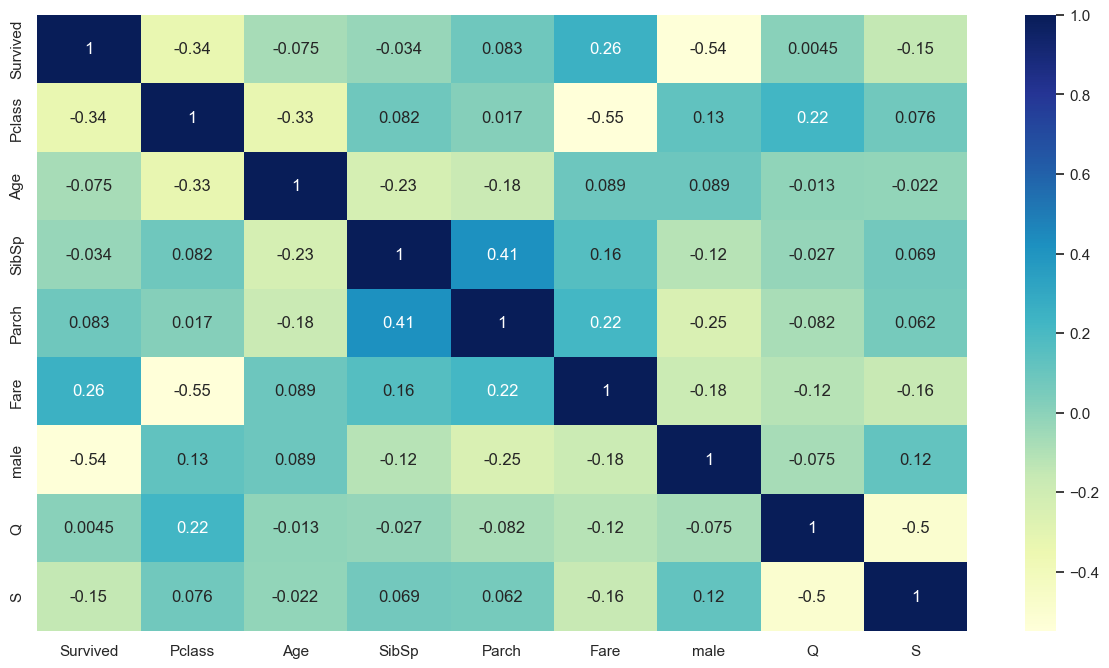

In [16]:

sb.set_theme(rc={'figure.figsize' : (15,8)})
sb.heatmap(df.corr(), annot=True, cmap="YlGnBu")


<Axes: xlabel='Survived', ylabel='count'>

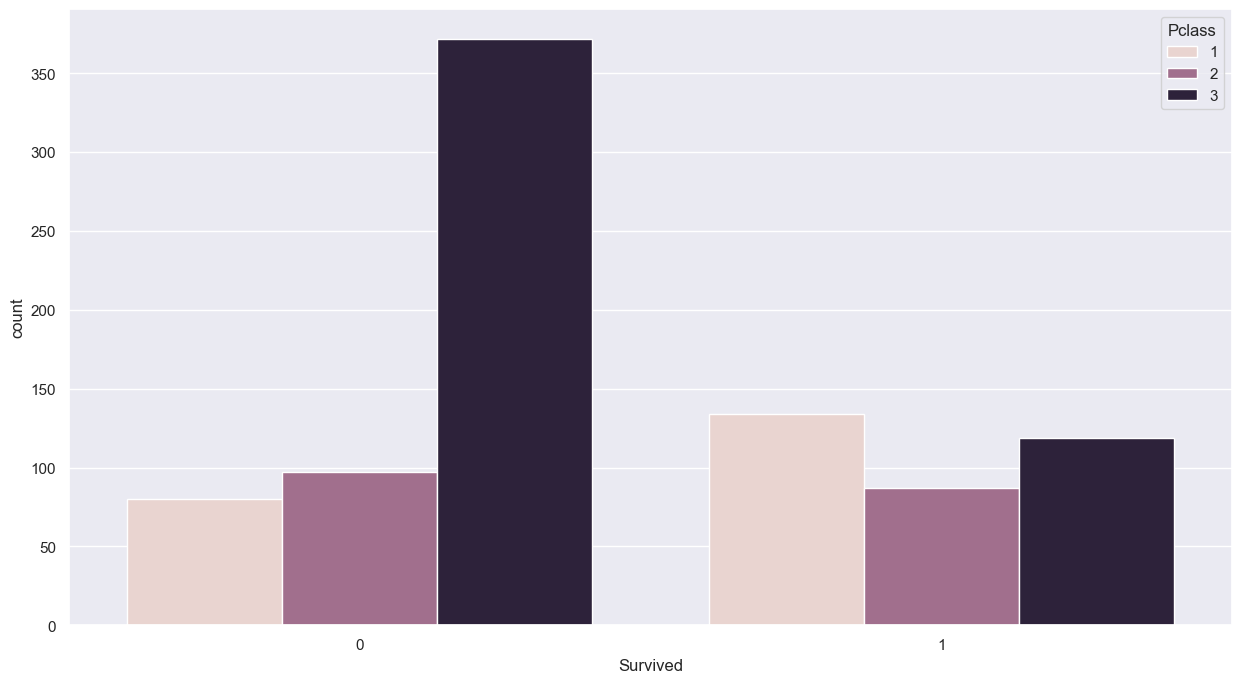

In [17]:
sb.countplot(x="Survived", data=df, hue="Pclass")

In [18]:
X = df.drop(["Survived"], axis=1)
Y = df["Survived"]

In [19]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, Y_ent, Y_pru = train_test_split(X,Y, test_size=.2)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

resultados = []
for i in range(1,25):
    modelo = DecisionTreeClassifier(max_depth=i)
    modelo.fit(X_ent,Y_ent)
    predicciones = modelo.predict(X_pru)

    exactitud = accuracy_score(Y_pru, predicciones)
    resultados.append(exactitud)
    print(f"Resultado es {i}: {exactitud}")

Resultado es 1: 0.7808988764044944
Resultado es 2: 0.7808988764044944
Resultado es 3: 0.8033707865168539
Resultado es 4: 0.8089887640449438
Resultado es 5: 0.8202247191011236
Resultado es 6: 0.8202247191011236
Resultado es 7: 0.8146067415730337
Resultado es 8: 0.8089887640449438
Resultado es 9: 0.8146067415730337
Resultado es 10: 0.8202247191011236
Resultado es 11: 0.7921348314606742
Resultado es 12: 0.8146067415730337
Resultado es 13: 0.7865168539325843
Resultado es 14: 0.8202247191011236
Resultado es 15: 0.8146067415730337
Resultado es 16: 0.7808988764044944
Resultado es 17: 0.7921348314606742
Resultado es 18: 0.7808988764044944
Resultado es 19: 0.7865168539325843
Resultado es 20: 0.7808988764044944
Resultado es 21: 0.7921348314606742
Resultado es 22: 0.7865168539325843
Resultado es 23: 0.7921348314606742
Resultado es 24: 0.7921348314606742


<Axes: >

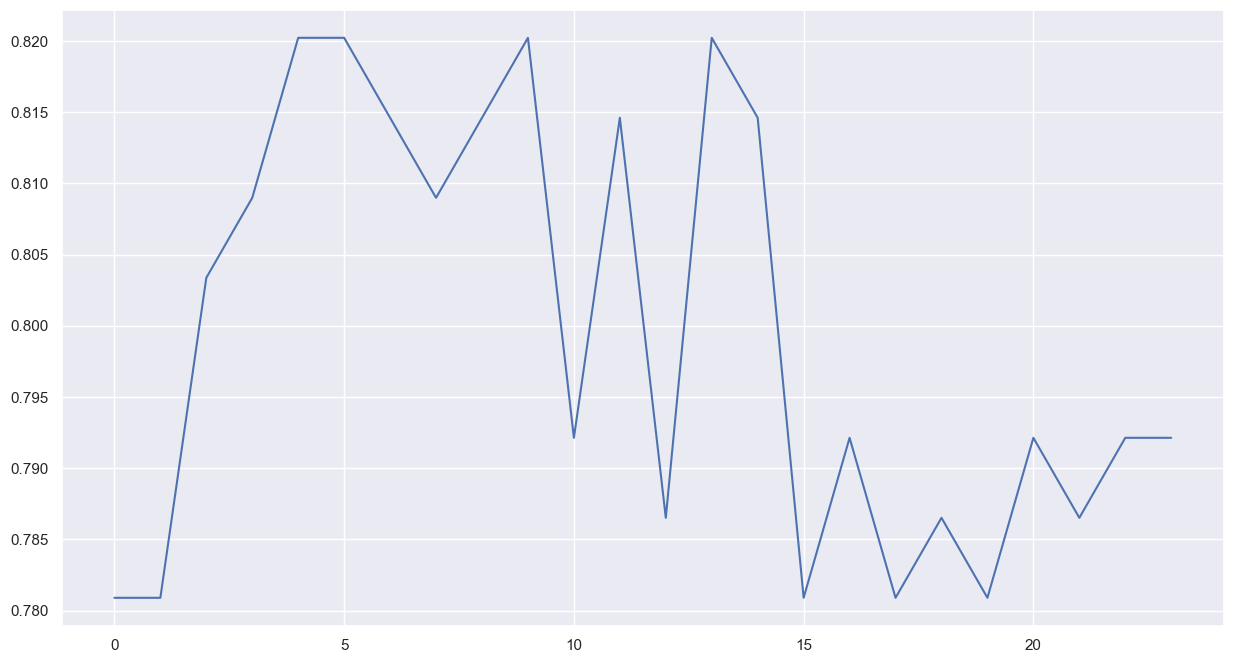

In [23]:
sb.lineplot(data=resultados)

In [28]:

modelo = DecisionTreeClassifier(max_depth=9)
modelo.fit(X_ent,Y_ent)
predicciones = modelo.predict(X_pru)

exactitud = accuracy_score(Y_pru, predicciones)
resultados.append(exactitud)
print(f"Resultado es {i}: {exactitud}")

Resultado es 24: 0.8202247191011236


In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       108
           1       0.83      0.69      0.75        70

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178



In [30]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(Y_pru, predicciones), columns=["Pred: NO", "Pred: Si"], index=["Real : NO", "Real: Si"])

,Pred: NO,Pred: Si
Real : NO,98,10
Real: Si,22,48


[Text(0.46516047297297297, 0.95, 'male <= 0.5\n0.471\n711\n[441, 270]\nMurio'),
 Text(0.2195945945945946, 0.85, 'Pclass <= 2.5\n0.38\n243\n[62, 181]\nVivio'),
 Text(0.34237753378378377, 0.8999999999999999, 'True  '),
 Text(0.0945945945945946, 0.75, 'Age <= 2.5\n0.114\n132\n[8, 124]\nVivio'),
 Text(0.08108108108108109, 0.65, '0.0\n1\n[1, 0]\nMurio'),
 Text(0.10810810810810811, 0.65, 'Fare <= 29.356\n0.101\n131\n[7, 124]\nVivio'),
 Text(0.08108108108108109, 0.55, 'Fare <= 28.231\n0.198\n54\n[6, 48]\nVivio'),
 Text(0.06756756756756757, 0.45, 'SibSp <= 0.5\n0.171\n53\n[5, 48]\nVivio'),
 Text(0.04054054054054054, 0.35, 'Fare <= 13.396\n0.105\n36\n[2, 34]\nVivio'),
 Text(0.02702702702702703, 0.25, 'Fare <= 12.675\n0.18\n20\n[2, 18]\nVivio'),
 Text(0.013513513513513514, 0.15, '0.0\n7\n[0, 7]\nVivio'),
 Text(0.04054054054054054, 0.15, 'Age <= 26.0\n0.26\n13\n[2, 11]\nVivio'),
 Text(0.02702702702702703, 0.05, '0.444\n3\n[1, 2]\nVivio'),
 Text(0.05405405405405406, 0.05, '0.18\n10\n[1, 9]\nVivio'

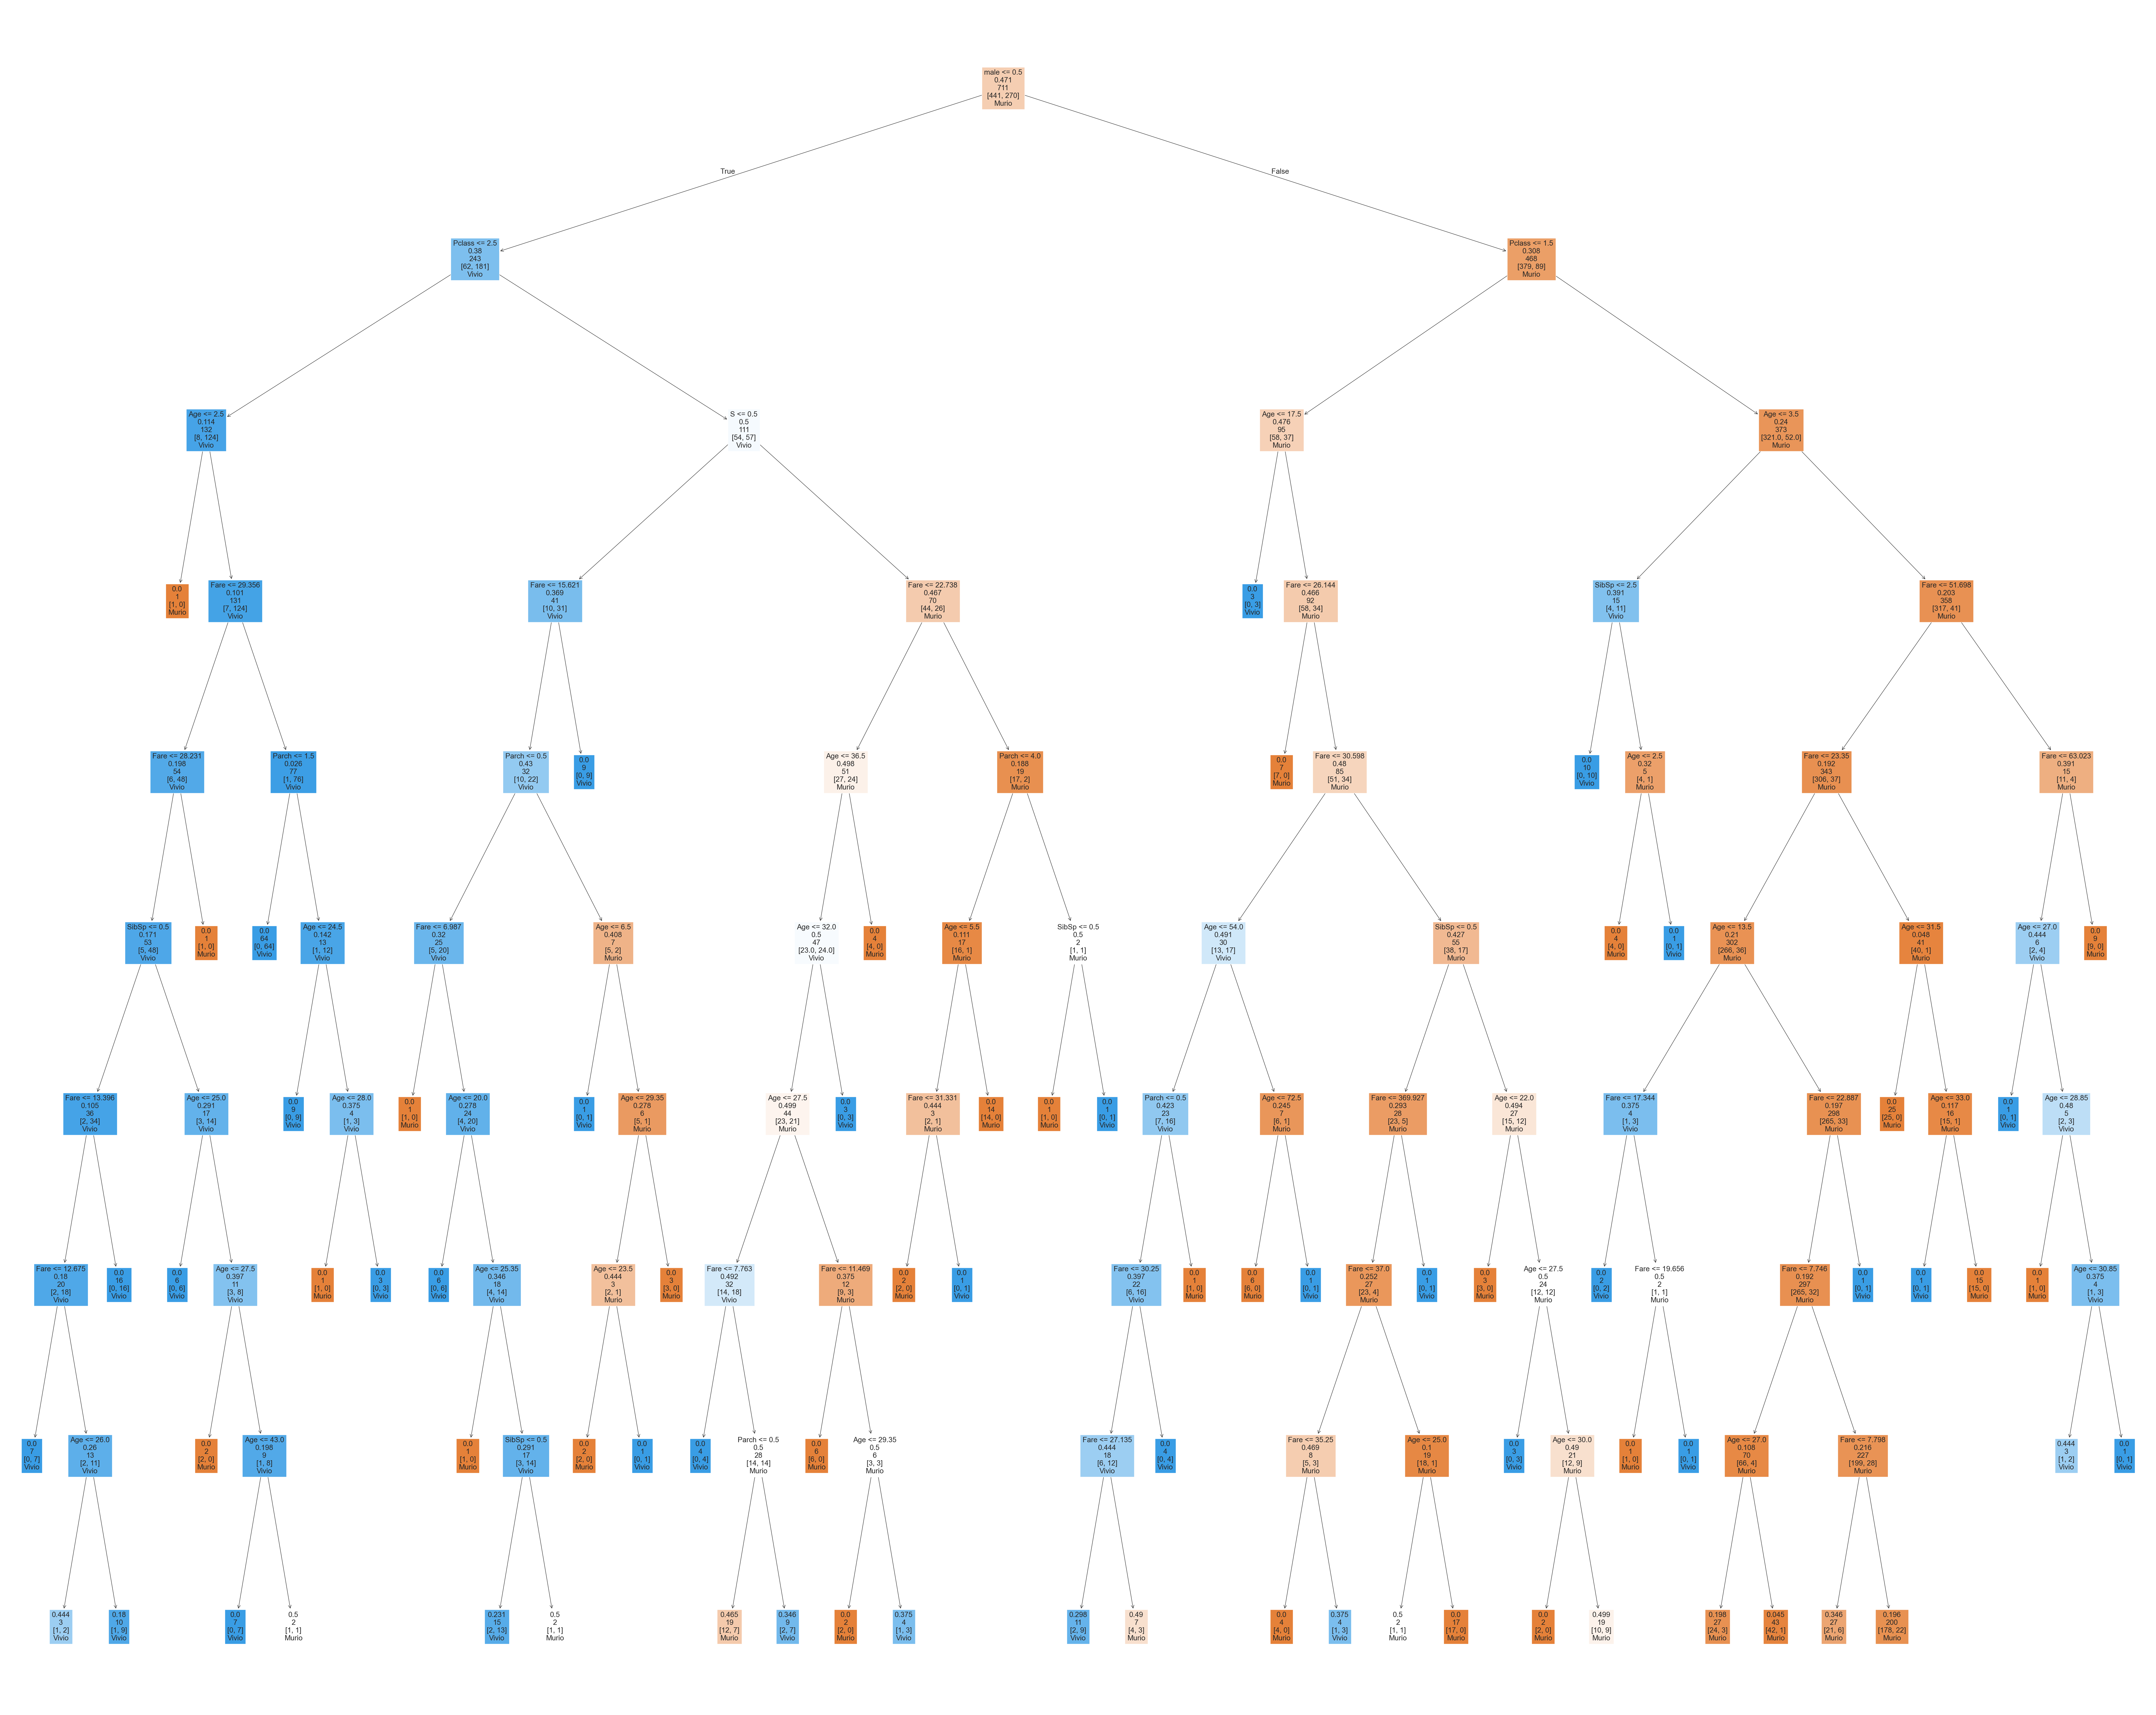

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,80))
plot_tree(modelo, feature_names=X_ent.columns, class_names=["Murio","Vivio"], filled=True, label="none")